In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
output_path = r"output/"

In [4]:
rotating_mnist_train_dataset = os.path.join(output_path, "rotating_mnist_train_3_64_angles.npy")
rotating_mnist_test_dataset = os.path.join(output_path, "rotating_mnist_test_3_64_angles.npy")

In [5]:
train_rotated_imgs = np.load(rotating_mnist_train_dataset)
test_rotated_imgs = np.load(rotating_mnist_test_dataset)

In [6]:
from vae_train import *

In [7]:
train_loader = load_rotating_mnist_data(rotating_mnist_train_dataset, n_angels=64)

In [38]:
test_loader = load_rotating_mnist_data(rotating_mnist_test_dataset, n_angels=64)

In [10]:
x = next(iter(train_loader))[0]


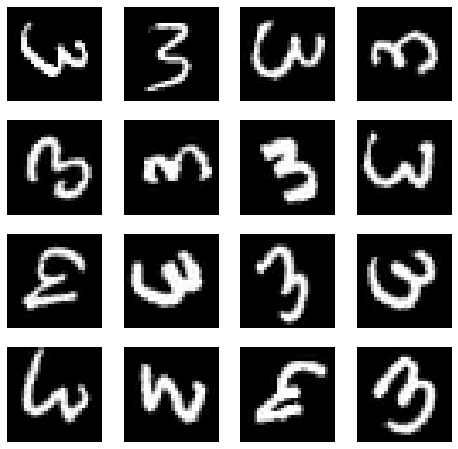

In [12]:
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
for ax, img in zip(axs.flat, x.cpu()):
    ax.imshow(img.reshape(28, 28), cmap="gray")
    ax.axis('off')

In [17]:
from vae_model import *

In [18]:
device = get_device()

In [21]:
vae = VAE(device, latent_dim=16)

# GP part

In [22]:
vae.encoder.load_state_dict(torch.load("output/MNIST-VAE/encoder.pt"))

<All keys matched successfully>

In [23]:
x_tr_true = np.load(rotating_mnist_train_dataset)

In [25]:
x = torch.tensor(x_tr_true, dtype=torch.float32, device=device)

In [26]:
x.shape

torch.Size([180, 64, 28, 28])

In [29]:
img_shape=(28, 28)

In [27]:
dataset_loader = torch.utils.data.DataLoader(x, batch_size=1, shuffle=False)

In [28]:
t = next(iter(dataset_loader))

In [43]:
t.shape

torch.Size([1, 64, 28, 28])

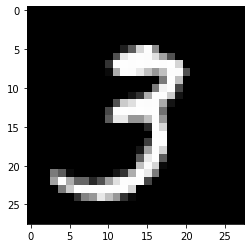

In [44]:
plt.imshow(t[0][0].cpu(), cmap="gray")

In [45]:

x_gp_temp = vae.predict_encoder(t.view(-1, 1, *img_shape))

In [46]:
x_gp_temp.shape

torch.Size([64, 16])

In [50]:
x_gp_temp[1:].shape

torch.Size([63, 16])

In [51]:
x_gp_temp[0].view(1, -1).shape

torch.Size([1, 16])

In [48]:
y_gp_temp = torch.cat((x_gp_temp[1:], x_gp_temp[0].view(1, -1))).view(
        (1, n_classes, -1)
    )

In [49]:
y_gp_temp.shape

torch.Size([1, 16, 64])

In [59]:
n_classes = 16
x_gp=None
y_gp = None
true_x =None
for x in dataset_loader:
    x_gp_temp = vae.predict_encoder(x.view(-1, 1, *img_shape))

    y_gp_temp = torch.cat((x_gp_temp[1:], x_gp_temp[0].view(1, -1))).view(
        (1, n_classes, -1)
    )
    y_gp = y_gp_temp if y_gp is None else torch.cat((y_gp, y_gp_temp))

    x_gp = (
        x_gp_temp.view(1, n_classes, -1)
        if x_gp is None
        else torch.cat((x_gp, x_gp_temp.view(1, n_classes, -1)))
    )

    true_x = (
        x.view(-1, n_classes, *img_shape)
        if true_x is None
        else torch.cat((true_x, x.view(-1, n_classes, *img_shape)))
    )

In [54]:
x_gp.shape

torch.Size([180, 16, 64])

In [55]:
true_x.shape

torch.Size([720, 16, 28, 28])

In [56]:
y_gp.shape

torch.Size([180, 16, 64])

question: what is the training data in this case for the GP?